# Анализ рынка компьютерных игр

**Описание исследования.**
    
Интернет-магазин продаёт компьютерные игры. Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования.**
 
Определить потенциально популярный продукт
    
**Суть исследования**: 

Выявить определяющие успешность игры закономерности.
    
_____
**Задачи исследования.**

1. Выбрать данные за актуальный период.
2. Определить потенциально прибыльные платформы.
3. Определить зависимость продаж от отзывов.
4. Определить потенциально прибыльные жанры.
5. Составить портрет пользователя кажлного региона.
6. Проверить гипотезы.
_____
**Исходные данные.**
    
Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.           
    
Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv') #Открываем файл с даннымии

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведем названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразуем данные в нужные типы

In [7]:
data['user_score'] #Видим странное значение tbd

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: object

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
#data['user_score'] = data['user_score'].replace('tbd', float('nan')) #удалим его

In [10]:
sum(data['user_score'].isna())

6701

In [11]:
data[data['user_score'] == 'tbd'].shape[0]

2424

In [12]:
sum(data['critic_score'].isna())

8578

In [13]:
data[data['critic_score'] == 'tbd'].shape[0]

0

In [14]:
data['user_score'] = data['user_score'].replace('tbd', float('nan'))

In [15]:
sum(data['rating'].isna())

6766

Больше половины данных в столбах с рейтингом и отзывами недоступны для анализа (NaN или "tbd"). Заполнить пропуски в столбцах рейтинга и отзывов средним и медианой нельзя, т.к это исказит результаты исследования. Tbd означает "to be determined", т.е. "пока не определено", что означает, что отзыва на данный продукт нет. Заменим 'tbd' на NaN, для удобства работы с численными значениями столбца. К пропускам в столбцах с рейтингом могли привести нежелание пользвователей оставить отзыв или отсутствие оценки от критиков. Пропускив в столбце с отзывами пользователей больше, но незначительно.

In [16]:
data['user_score'] = data['user_score'].astype(float) #изменим тип данных на float

In [17]:
data['rating'].unique() #Видим здесь категориальные значения: everyone, mature, adults only, teen и т.д.

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заполнить пропуски не представляется возможным. Получить название игры неоткуда, как и год выпуска, и жанр. Заполнить пропуски в столбцах рейтинга средним и медианой нельзя, т.к это исказит результаты исследования. К пропускам в столбцах с рейтингом могли привести нежелание пользвователей оставить отзыв или отсутствие оценки от критиков

In [18]:
data['rating'] = data['rating'].replace(float('nan'), 'unknown')

Заполнил пропуски значением "Unknown", чтобы не потерять данные при построении графика для игр в соответствии с их рейтингами.


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [20]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [21]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales']].sum(axis='columns')

In [22]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,39.47
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,30.38


Для поиска дубликатов приведем столбцы с названиями, консолями и жанрами к нижнему регистру.

In [23]:
data['name'] = data['name'].str.lower() 

In [24]:
data['platform'] = data['platform'].str.lower()

In [25]:
data['genre'] = data['genre'].str.lower()

In [26]:
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [27]:
data.duplicated().sum()

0

Полностью повторяющихся строк нет

In [31]:
data[data.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1591,need for speed: most wanted,x360,2005.0,racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.15
4127,sonic the hedgehog,ps3,NaN,platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+,0.48
11715,need for speed: most wanted,pc,2012.0,racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.06
14244,NaN,gen,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,unknown,0.03
16230,madden nfl 13,ps3,2012.0,sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


In [29]:
data[(data['name'] == 'need for speed: most wanted') & (data['platform'] == 'x360')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.41
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.15


Судя по годам выхода игры, втрое значение не дуюликат, а перевыпуск, т.е. полноценная новая игра, поэтому удалять его не будем.

Скорее всего, это дубликат, поскольку год выхода не указан. Возможно, продажи по этой игре были почему-то разбиты на две чати. Тогда можно было бы объединить продажи. Однако возможно это просто ошибка в данных, поэтому надежнее удалить эти значения.

In [30]:
data = data[(data.index != 1745) & (data.index != 4127)]

In [31]:
data[(data['name'] == "madden nfl 13") & (data['platform'] == 'ps3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,madden nfl 13,ps3,2012.0,sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.33
16230,madden nfl 13,ps3,2012.0,sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Аналогичная ситуация. Удалим эти строки

In [32]:
data = data[(data.index != 604) & (data.index != 16230)]

In [33]:
data[(data['name'].isna()) & (data['platform'] == 'gen')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown,2.31
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown,0.03


Для этих строк почти полностью отсутствуют необходимые для анализа данные. Можем их удалить.

In [34]:
data = data[(data.index != 659) & (data.index != 14244)]

Обработал дубликаты.

В ходе первочного знакомства с данными были выполнены следующие действия. Данные были преобразованы в нужные типы. В столбцах с рейтингами и отзывами было обнаружено большое количество пропусков. Эти пропуски были заполнены "заглушкой" "unknown", чтобы не потерять эти данные при дальнейшем анализе. Также был проведен поиск дубликатов. Их было мало, каждый случай был рассмотрен отдельно. Теперь данные очищены от дубликатов, пропуски заполнены. Все готово для анализа.   

**Исследовательский анализ данных**

In [35]:
data.pivot_table(index = 'year_of_release', values='platform', 
                 aggfunc='count').sort_values(by='platform', ascending=False)

,platform
year_of_release,
2008.0,1427
2009.0,1426
2010.0,1255
2007.0,1197
2011.0,1136
2006.0,1005
2005.0,939
2002.0,829
2003.0,775


In [36]:
data.duplicated(subset = ['name', 'year_of_release']).sum()

4283

Имеем 4383 игры. которые были учтены более 1 раза. Исправим это, посчитав их только по 1 разу.

In [37]:
data.drop_duplicates(subset=['name', 'year_of_release'], keep='first').pivot_table(
    index = 'year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=False)

,name
year_of_release,
2008.0,1039
2009.0,1001
2010.0,900
2007.0,884
2011.0,779
2006.0,773
2005.0,657
2002.0,631
2004.0,550


Видим, что с каждым годом число выпускаемых игр росло. До 1994 года игр выпускалось мало, затем началось резкое увеличение числа выпускаемых игр


Построим график

<AxesSubplot:xlabel='year_of_release'>

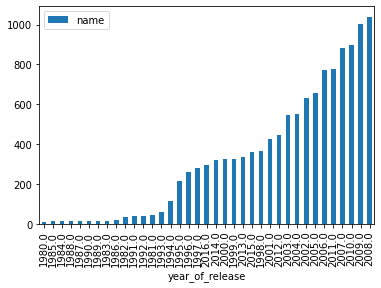

In [38]:
data.drop_duplicates(subset=['name', 'year_of_release'], keep='first').pivot_table(
    index = 'year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=True).plot(kind='bar')

Рассмотрим продажи по платформам

In [39]:
data.pivot_table(index='platform', values='total_sales', aggfunc='count').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
ps2,2161
ds,2151
ps3,1327
wii,1320
x360,1262
psp,1209
ps,1197
pc,974
xb,824


Видим, что больше всего игр выходило на PS2 и DS

Что касается суммарных продаж по платформам

In [40]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
ps2,1062.33
x360,885.66
wii,828.44
ps3,800.64
ds,746.86
ps,689.95
gba,310.12
ps4,265.79
psp,252.63


PS2 - единоличный лидер, за ним идут X360, PS3 и Wii

Построим распределение по годам для платформ с наибольшими суммарными продажами

<AxesSubplot:>

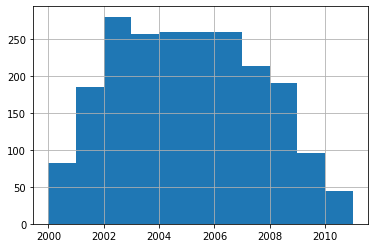

In [41]:
data.query('platform == "ps2"')['year_of_release'].hist(bins=11)

<AxesSubplot:>

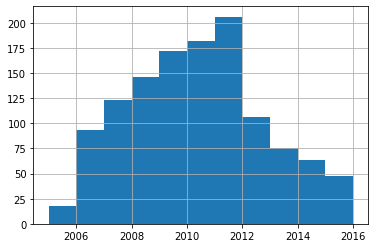

In [42]:
data.query('platform == "x360"')['year_of_release'].hist(bins=11)

<AxesSubplot:>

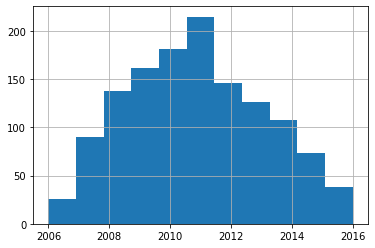

In [43]:
data.query('platform == "ps3"')['year_of_release'].hist(bins=11)

<AxesSubplot:>

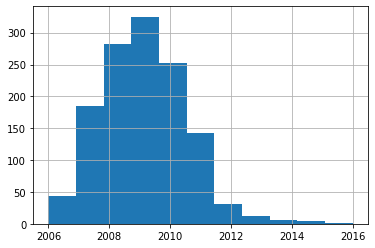

In [44]:
data.query('platform == "wii"')['year_of_release'].hist(bins=11)

<AxesSubplot:>

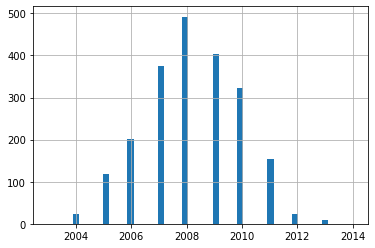

In [45]:
data.query('platform == "ds"')['year_of_release'].hist(bins=50, range=(2003, 2014))

<AxesSubplot:>

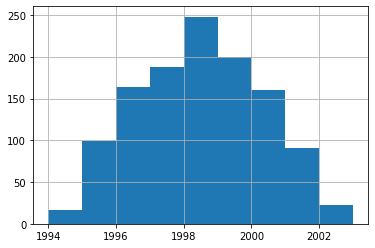

In [46]:
data.query('platform == "ps"')['year_of_release'].hist(bins=9)

In [47]:
platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index()['platform'].loc[:6].tolist()

In [48]:
platforms #топ-6 платформ по продажам за все время

['ps2', 'x360', 'wii', 'ps3', 'ds', 'ps', 'gba']

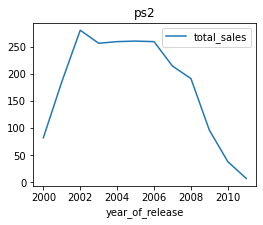

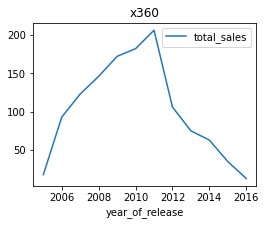

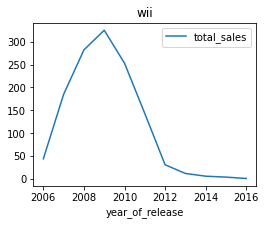

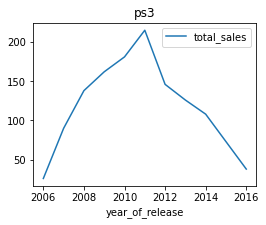

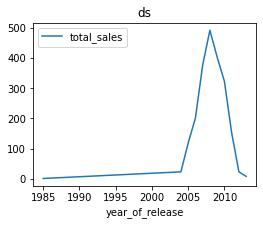

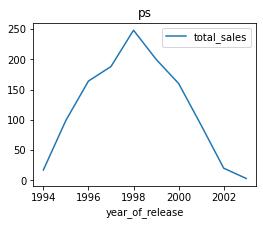

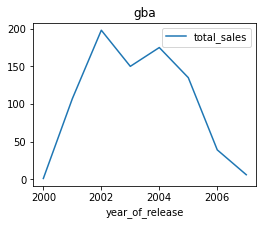

In [49]:
for p in platforms:
    data.query(f'platform == "{p}"').pivot_table(
        index='year_of_release', values='total_sales', aggfunc='count').reset_index().plot(
        x = 'year_of_release', y = 'total_sales', kind='line', title= p, figsize=(4,3))
        

По графикам видим, что для наиболее популярных платформ жизненный цикл составляет около 10 лет

Учитывая этот  факт отфильтруем данные за период до 2005, поскольку они вряд ли помогут сделать точный прогноз на 2017 год.

In [50]:
data_2014 = data.query('year_of_release >= 2014')

Рассмотрим, какие платформы лиддируют по продажам, растут или падают

In [51]:
data_2014.groupby(by='platform', as_index=False)['total_sales'].sum().sort_values(
    by='total_sales', ascending=False).reset_index(drop=True)

,platform,total_sales
0,ps4,243.67
1,xone,127.84
2,3ds,83.00
3,ps3,58.81
4,x360,43.87
5,wiiu,39.82
6,pc,25.20
7,psv,20.59
8,wii,4.67
9,psp,0.36


За последние 3 года лидерами по общим продажам были ps4, xone, ds3.

Теперь рассмотрим изменение продаж за последние 3 года для разных платформ, чтобы выявить наиболее перспективные

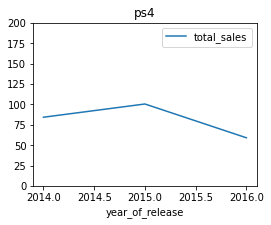

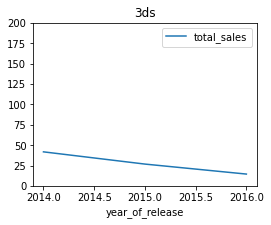

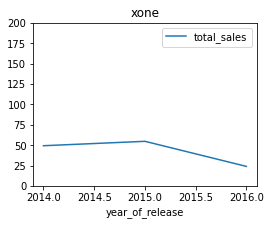

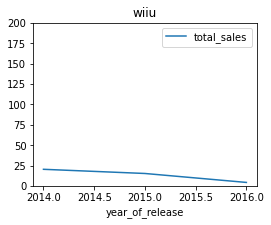

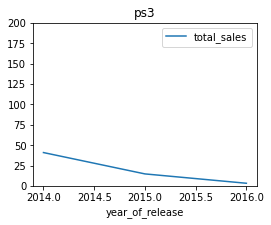

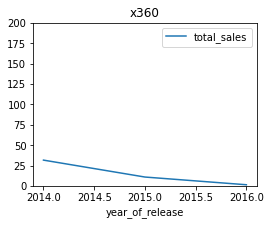

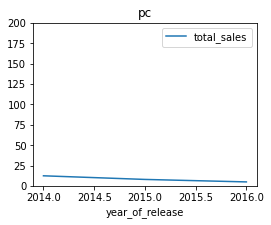

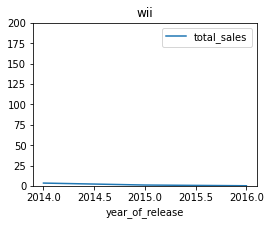

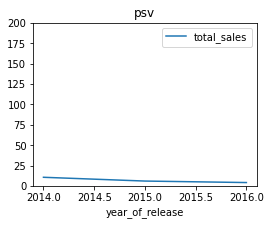

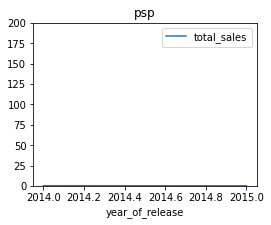

In [52]:
for platform in data_2014['platform'].unique():
    data_2014.query(f'platform == "{platform}"').pivot_table(index='year_of_release',
    values='total_sales', aggfunc='sum').reset_index().plot(x = 'year_of_release', y='total_sales',
    kind='line', title= platform, figsize=(4,3), ylim=(0,200))

К потенциально прибыльным можно отнести PS4, 3DS и XOne, поскольку, судя по графикам, эти платформы останутся востребованы в 2017.

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

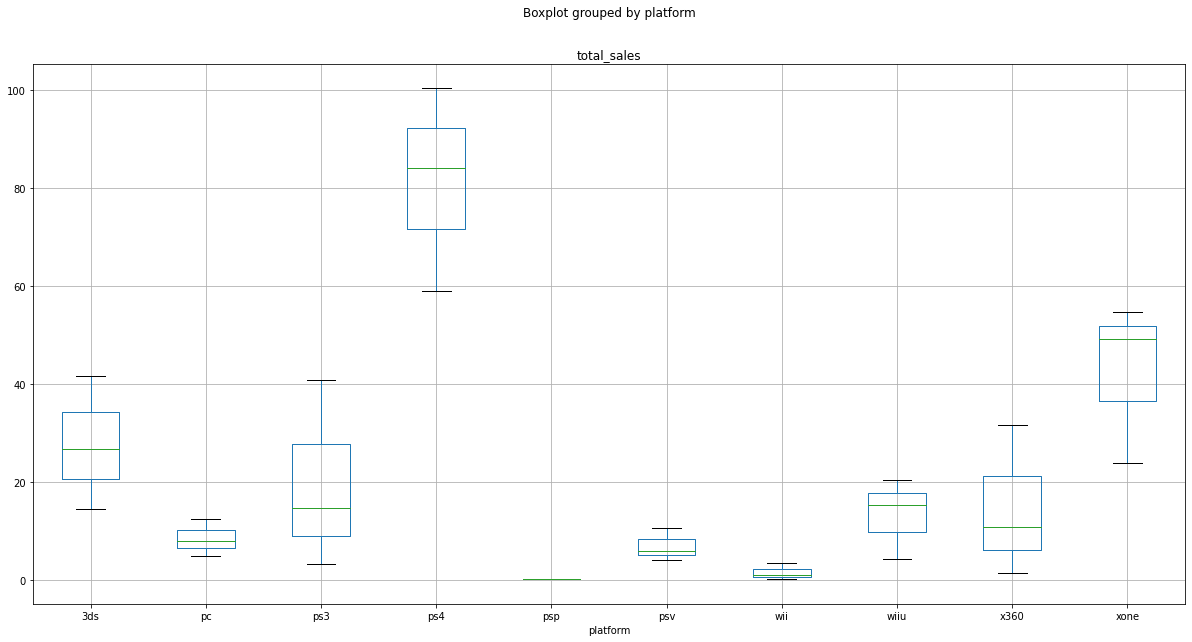

In [53]:
data_2014.pivot_table(
    index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').boxplot(
    column='total_sales', by='platform', figsize = (20,10))

(0.0, 1.0)

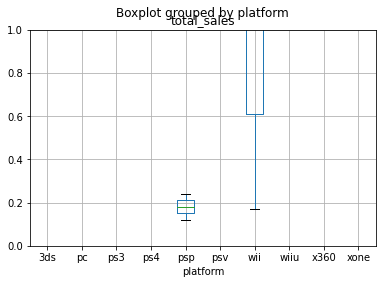

In [54]:
ax = data_2014.pivot_table(
    index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').boxplot(
    column='total_sales', by='platform')
ax.set_ylim(0, 1)

Незачем рассматривать ящики с усами для платформ, которые уже не актуальны, поэтому ниже работаю только с тремя перспективными

Рассмотрим только перспективные платформы

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

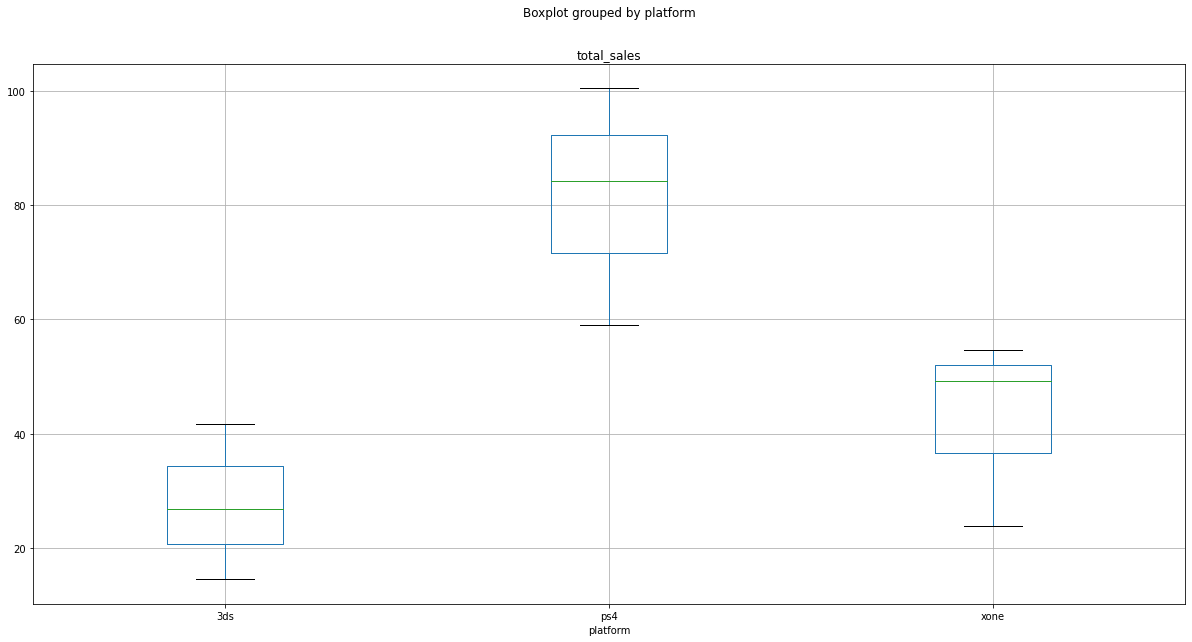

In [55]:
data_2014.query('platform in ["ps4", "xone", "3ds"]').pivot_table(
    index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').boxplot(
        column='total_sales', by='platform', figsize=(20,10))

На графике отображены медианные значения продаж для данных платформ, 2 и 3 квартили, минимальные и максимальные значения, совпадающие с концами усов, поскольку выбросов ни для одной платформы нет.


In [56]:
data_2014.query('platform == "xone"').pivot_table(
    index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').describe()

,total_sales
count,3.000000
mean,42.613333
std,16.421877
min,23.910000
25%,36.585000
50%,49.260000
75%,51.965000
max,54.670000


In [57]:
data_2014.query('platform == "ps4"').pivot_table(
    index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').describe()

,total_sales
count,3.000000
mean,81.223333
std,20.876931
min,59.010000
25%,71.615000
50%,84.220000
75%,92.330000
max,100.440000


In [58]:
data_2014.query('platform == "3ds"').pivot_table(
    index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').describe()

,total_sales
count,3.000000
mean,27.666667
std,13.648107
min,14.500000
25%,20.625000
50%,26.750000
75%,34.250000
max,41.750000


По графику и таблицам можем сказать, что ps4 серьезно опережает конкурентов: даже минимальное значение продаж ps4 превосходит максимальны продажи конкурентов. Для каждой платформы среднее значение почти совпадает с медианным, что еще раз подтверждает отсутствие выбросов, уже замеченное нами на графике.  В целом можем отметить, что продажи для ps4 намного больше продаж xone и 3ds

Посмотрим, как влияют на продажи PS4 отзывы пользователей и критиков

In [59]:
data_2014.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,12.25
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014.0,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,10.94
77,fifa 16,ps4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
87,star wars battlefront (2015),ps4,2015.0,shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,6.70


Text(0, 0.5, 'total_sales')

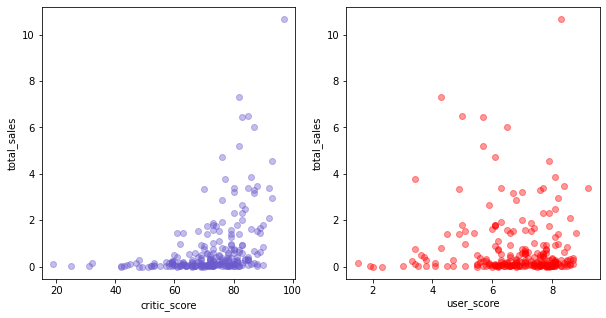

In [60]:
figure = plt.figure(figsize=(10,5))
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)
ax1.scatter(x=data_2014[data_2014['platform'] == 'ps4']['critic_score'], 
            y=data_2014[data_2014['platform'] == 'ps4']['total_sales'], 
            c= 'Slateblue', alpha = 0.4, marker = 'o')
ax2.scatter(x=data_2014[data_2014['platform'] == 'ps4']['user_score'], 
            y=data_2014[data_2014['platform'] == 'ps4']['total_sales'], 
            c= 'red', alpha = 0.4, marker = 'o')
ax1.set_xlabel('critic_score')
ax1.set_ylabel('total_sales')
ax2.set_xlabel('user_score')
ax2.set_ylabel('total_sales')

In [61]:
data_2014[data_2014['platform'] == 'ps4']['total_sales'].corr(
    data_2014[data_2014['platform'] == 'ps4']['critic_score'])

0.4021203477635433

In [62]:
data_2014[data_2014['platform'] == 'ps4']['total_sales'].corr(
    data_2014[data_2014['platform'] == 'ps4']['user_score'])

-0.039364345213287334

Судя по коэффициентам корреляции, прямой зависимости между общими продажами и отзывами пользователей нет. Зависимость между между общими продажами и отзывами критиков слабая.

Для двух других перспективных платформ имеем следующее:

In [63]:
data_2014[data_2014['platform'] == 'xone']['total_sales'].corr(
    data_2014[data_2014['platform'] == 'xone']['critic_score'])

0.4286498963779636

In [64]:
data_2014[data_2014['platform'] == 'xone']['total_sales'].corr(
    data_2014[data_2014['platform'] == 'xone']['user_score'])

-0.07039252638189664

In [65]:
data_2014[data_2014['platform'] == '3ds']['total_sales'].corr(
    data_2014[data_2014['platform'] == '3ds']['critic_score'])

0.3117520311601232

In [66]:
data_2014[data_2014['platform'] == '3ds']['total_sales'].corr(
    data_2014[data_2014['platform'] == '3ds']['user_score'])

0.21461640035191556

По коэффициентам корреляции можем сделать вывод, что линейной зависимости между отзывами и общими продажами нет.

Посмотрим на общее распределение игр по жанрам

In [67]:
data_2014['genre'].unique()

array(['shooter', 'action', 'role-playing', 'sports', 'fighting',
       'racing', 'misc', 'platform', 'simulation', 'adventure', 'puzzle',
       'strategy'], dtype=object)

Дубликатов нет

In [68]:
data_2014.groupby(by='genre', as_index=False)['total_sales'].agg(
    ['mean','count','sum']).sort_values(by='mean', ascending=False)

,mean,count,sum
genre,,,
shooter,1.167266,128,149.41
sports,0.590807,161,95.12
platform,0.428421,38,16.28
fighting,0.424833,60,25.49
role-playing,0.419910,221,92.80
racing,0.356957,69,24.63
misc,0.296637,113,33.52
action,0.285606,619,176.79
simulation,0.278182,44,12.24


Наиболее прибыльные жанры: Shooter, Platform, Sports. Наименее прибыльные: Strategy и Adventure.

***Составим портер каждого региона***

In [69]:
data_2014.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,12.25
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014.0,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,10.94
77,fifa 16,ps4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
87,star wars battlefront (2015),ps4,2015.0,shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,6.70


Для каждого региона определим самые популярные платформы

In [70]:
na_pivot =data_2014.groupby(by='platform', as_index=False)['na_sales'].sum().sort_values(
    by='na_sales', ascending=False).reset_index(drop=True)

In [71]:
na_pivot

,platform,na_sales
0,ps4,98.61
1,xone,81.27
2,x360,28.30
3,3ds,22.64
4,ps3,22.05
5,wiiu,19.36
6,pc,7.23
7,psv,2.52
8,wii,2.08
9,psp,0.00


В Северной Америке наиболее популярны платформы:ps4 и xone

In [72]:
na_pivot['percentage'] = na_pivot['na_sales']/na_pivot['na_sales'].sum()

In [73]:
na_pivot

,platform,na_sales,percentage
0,ps4,98.61,0.347145
1,xone,81.27,0.286102
2,x360,28.30,0.099627
3,3ds,22.64,0.079701
4,ps3,22.05,0.077624
5,wiiu,19.36,0.068155
6,pc,7.23,0.025452
7,psv,2.52,0.008871
8,wii,2.08,0.007322
9,psp,0.00,0.000000


В столбце percentage представлены доли продаж платформы от всех продаж

In [74]:
eu_pivot =data_2014.groupby(by='platform', as_index=False)['eu_sales'].sum().sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
eu_pivot['percentage'] = eu_pivot['eu_sales']/eu_pivot['eu_sales'].sum()

In [75]:
eu_pivot

,platform,eu_sales,percentage
0,ps4,130.04,0.480420
1,xone,46.25,0.170866
2,ps3,25.54,0.094355
3,pc,17.97,0.066388
4,3ds,16.12,0.059554
5,x360,15.49,0.057226
6,wiiu,13.15,0.048581
7,psv,3.53,0.013041
8,wii,2.59,0.009568
9,psp,0.00,0.000000


В Европе картина похожая. Самые популярные платформы также ps4 и xone

In [76]:
jp_pivot =data_2014.groupby(by='platform', as_index=False)['jp_sales'].sum().sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
jp_pivot['percentage'] = jp_pivot['jp_sales']/jp_pivot['jp_sales'].sum()

In [77]:
jp_pivot

,platform,jp_sales,percentage
0,3ds,44.24,0.475239
1,ps4,15.02,0.161349
2,psv,14.54,0.156193
3,ps3,11.22,0.120529
4,wiiu,7.31,0.078526
5,psp,0.36,0.003867
6,xone,0.32,0.003438
7,x360,0.08,0.000859
8,pc,0.00,0.000000
9,wii,0.00,0.000000


В Японии на платформу xone, одного из лидеров по продажам в Европе и Америке, приходится всего 0,3% продаж. В то же время абсолютным лидером является 3DS, занявшая 4-е и 5-е места в Америке и Европе соответственно. Стоит отметить, что и в Японии платформа ps4 н используется часто (16%). Также Японцы используют консоль psv, которая практически не встречается на американском и европейском рынках

Картины долей продаж в Европе и Америке в целом схожи, чего нельзя сказать по отношению к Японии. Из этого можно сделать вывод о серьезном отлиии японского рынка игровых платформ от американского и европейского.

Для каждого региона определим самые популярные жанры

In [78]:
na_pivot2 =data_2014.groupby(by='genre', as_index=False)['na_sales'].sum().sort_values(by='na_sales', ascending=False).reset_index(drop=True)
na_pivot2['percentage'] = na_pivot2['na_sales']/na_pivot2['na_sales'].sum()

In [79]:
na_pivot2

,genre,na_sales,percentage
0,shooter,79.02,0.278181
1,action,72.53,0.255333
2,sports,46.13,0.162395
3,role-playing,33.47,0.117827
4,misc,15.05,0.052982
5,fighting,12.43,0.043758
6,racing,8.74,0.030768
7,platform,6.79,0.023903
8,adventure,5.64,0.019855
9,simulation,2.63,0.009259


В Северной Америке наиболее популярны жанры: Action, Sports и Shooter

In [80]:
data_2014.groupby(by='genre', as_index=False)['na_sales'].agg(
    ['mean','count','sum']).sort_values(by='mean', ascending=False)

,mean,count,sum
genre,,,
shooter,0.617344,128,79.02
sports,0.286522,161,46.13
fighting,0.207167,60,12.43
platform,0.178684,38,6.79
role-playing,0.151448,221,33.47
misc,0.133186,113,15.05
racing,0.126667,69,8.74
action,0.117173,619,72.53
simulation,0.059773,44,2.63


Для Америки наиболее прибыльны жанры shooter, sports и fighting.

In [81]:
eu_pivot2 =data_2014.groupby(by='genre', as_index=False)['eu_sales'].sum().sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
eu_pivot2['percentage'] = eu_pivot2['eu_sales']/eu_pivot2['eu_sales'].sum()

In [82]:
eu_pivot2

,genre,eu_sales,percentage
0,action,74.68,0.275898
1,shooter,65.52,0.242057
2,sports,45.73,0.168945
3,role-playing,28.17,0.104071
4,racing,14.13,0.052202
5,misc,12.86,0.047510
6,simulation,7.30,0.026969
7,platform,6.80,0.025122
8,fighting,6.69,0.024716
9,adventure,6.49,0.023977


В Европе наиболее популярны жанры: Action, Sports и Shooter. Процентные соотношения схожи с американскими

In [83]:
data_2014.groupby(by='genre', as_index=False)['eu_sales'].agg(
    ['mean','count','sum']).sort_values(by='mean', ascending=False)

,mean,count,sum
genre,,,
shooter,0.511875,128,65.52
sports,0.284037,161,45.73
racing,0.204783,69,14.13
platform,0.178947,38,6.80
simulation,0.165909,44,7.30
role-playing,0.127466,221,28.17
action,0.120646,619,74.68
misc,0.113805,113,12.86
fighting,0.111500,60,6.69


Для Европы наиболее прибыльны жанры shooter, sports и racing.

In [84]:
jp_pivot2 =data_2014.groupby(by='genre', as_index=False)['jp_sales'].sum().sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
jp_pivot2['percentage'] = jp_pivot2['jp_sales']/jp_pivot2['jp_sales'].sum()

In [85]:
jp_pivot2

,genre,jp_sales,percentage
0,role-playing,31.16,0.334730
1,action,29.58,0.317757
2,fighting,6.37,0.068428
3,misc,5.61,0.060264
4,shooter,4.87,0.052315
5,adventure,3.60,0.038672
6,sports,3.26,0.035020
7,platform,2.69,0.028897
8,simulation,2.31,0.024815
9,racing,1.76,0.018906


В Японии все снова по-другому. На первое место вышел role-playing. Action опустился на второе место. Третье место занял fighting. Sports опустился на 6-е. Shooter упал до 5-й позиции, его популярность в Японии крошечная по сравнению я Америкой и Европой.

In [86]:
data_2014.groupby(by='genre', as_index=False)['jp_sales'].agg(
    ['mean','count','sum']).sort_values(by='mean', ascending=False)

,mean,count,sum
genre,,,
role-playing,0.140995,221,31.16
fighting,0.106167,60,6.37
platform,0.070789,38,2.69
puzzle,0.066429,14,0.93
simulation,0.052500,44,2.31
misc,0.049646,113,5.61
action,0.047787,619,29.58
shooter,0.038047,128,4.87
strategy,0.025676,37,0.95


Для Японии наиболее прибыльны жанры playing, fighting и platform

Рассмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе

In [87]:
data_2014.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,12.25
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014.0,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,10.94
77,fifa 16,ps4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
87,star wars battlefront (2015),ps4,2015.0,shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,6.70


In [88]:
data_2014.groupby(by='rating', as_index=False)[['na_sales', 'eu_sales', 'jp_sales']].sum()

,rating,na_sales,eu_sales,jp_sales
0,E,50.74,58.06,8.94
1,E10+,33.23,26.16,4.46
2,M,96.42,93.44,8.01
3,T,38.95,34.07,14.78
4,unknown,64.72,58.95,56.90


In [89]:
na_rating = data_2014.groupby(by='rating', as_index=False)['na_sales'].sum().sort_values(by='na_sales', ascending=False)
na_rating['percantage'] = na_rating['na_sales']/na_rating['na_sales'].sum()
na_rating.reset_index(drop=True)

,rating,na_sales,percantage
0,M,96.42,0.339435
1,unknown,64.72,0.227839
2,E,50.74,0.178624
3,T,38.95,0.137119
4,E10+,33.23,0.116982


In [90]:
eu_rating = data_2014.groupby(by='rating', as_index=False)['eu_sales'].sum().sort_values(by='eu_sales', ascending=False)
eu_rating['percantage'] = eu_rating['eu_sales']/eu_rating['eu_sales'].sum()
eu_rating.reset_index(drop=True)

,rating,eu_sales,percantage
0,M,93.44,0.345205
1,unknown,58.95,0.217785
2,E,58.06,0.214497
3,T,34.07,0.125868
4,E10+,26.16,0.096645


In [91]:
jp_rating = data_2014.groupby(by='rating', as_index=False)['jp_sales'].sum().sort_values(by='jp_sales', ascending=False)
jp_rating['percantage'] = jp_rating['jp_sales']/jp_rating['jp_sales'].sum()
jp_rating

,rating,jp_sales,percantage
4,unknown,56.90,0.611236
3,T,14.78,0.158771
0,E,8.94,0.096036
2,M,8.01,0.086046
1,E10+,4.46,0.047911


Видим, что серьезно отличаются масштабы продаж для данных регионов, поэтому для сравнения влияния рейтинга на продажи будем использовать доли.
Для Америки и Европы опять наблюдаем сходство основных показателей. Первое место забрал M, второе - игры с неопределенным рейтингом, третье - E, четвертое - T, пятое - E10+. Доли для этих регионов также примерно одинаковые. 

В Японии больше половины всех игр не имеют рейтинга. Да и определенные рейтинги поменялись местами: T - 15%, E - 10%, M - 8%, E10+ - 5%. Большое количество игр без рейтинга в Японии, возможно, объясняется тем, что японские игры не всегда проходят оценку в этой американской компании.

***Проверка гипотез***

In [92]:
data_2014.shape[0]

1689

Данных не слишком много, поэтому можем посчитать средние поьзовательские ретинги по генеральной совокупности

In [93]:
data_2014.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,12.25
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014.0,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,10.94
77,fifa 16,ps4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
87,star wars battlefront (2015),ps4,2015.0,shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,6.70


Проверим гипотезу о равенстве средних пользовательских рейтингов платформ XOne и PC

In [94]:
xone = data_2014[(data_2014['platform'] == 'xone') & (data_2014['user_score'] >= 0)]['user_score']

In [95]:
pc = data_2014[(data_2014['platform'] == 'pc') & (data_2014['user_score'] >= 0)]['user_score']

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные. 

In [96]:
results1 = st.ttest_ind(xone, pc)

In [97]:
alpha = .05 #уровень значимости
print('p-значение:', results1.pvalue)

if results1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


pvalue получилось 0,1, что выше выбранного уровня значимости, поэтому гипотезу о равенстве средних пользовательских рейтингов платформ XOne и PC отвергнуть нельзя

Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные

In [98]:
action = data_2014[(data_2014['genre'] == 'action') & (data_2014['user_score'] >= 0)]['user_score']

In [99]:
sports = data_2014[(data_2014['genre'] == 'sports') & (data_2014['user_score'] >= 0)]['user_score']

In [100]:
results2 = st.ttest_ind(action, sports)

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [101]:
alpha = .05 #уровень значимости
print('p-значение:', results2.pvalue)

if results2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Значение pvalue ниже выбранного уровня значимости, поэтому можем отвергнуть гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые.


<b>Общий вывод</b> 
    
Нам были доступны исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах. С помощью этих данных были найдены определяющие успешность игры закономерности. 
    
Рынок игр быстро меняется, поэтому при аналализе использовались данные только за последние 3 года.
    
Следует отметить, что для Японии данные отличаются. Ввиду ограниченности ресурсов компании сконцентрируемся на Европе и Америке.

К потенциально прибыльным платформам можем отнести PS4 и XOne. Эти консоли останутся востребованы в 2017 году. 
    
К потенциально прибыльным жанрам относятся  Shooter и Sports.
    
Прямой зависимости между отзывами критиков и пользователей и продажами нет, можно игнорировать этот параметр.
    
Среди игр с известным рейтингом ESRB по продажам лидируют игры с рейтингами M и E. Также следует отметить, что примерно пятая часть продаж в Европе и Америке прходится на игры без определенного жанра ESRB.
    

    
Можно руководствоваться этими данными при составлении рекламной компании на 2017 год для европейского и американского рынков.
    



    

    
    